# 2. Stoichiometry calculation and ternary plot of apatite

pyAp allows users to calculate the stoichiometry and mole fractions of components in apatite using functions `ApStoic.py` and `ApStoic_Ketcham.py`.  

The stoichiometry calculation method was adapted from Ketcham (2015) https://doi.org/10.2138/am-2015-5171  

The results can be plotted in the F-Cl-OH ternary diagram by calling functions in `ApThernary.py`.  See an example below.

### Import releavant modules and data

Import modules

In [1]:
import matplotlib.pyplot as plt, pandas as pd, math

## use the 3 lines below if you want to use the pyAp codes inthe subdirectory next to the current path
## comment them, if you want to use the pyAp installed elsewhere on your computer
import os, sys
if not os.path.exists('pyAp') and os.path.exists('../pyAp'): # hack to allow scripts to be placed in subdirectories next to pyAp:
    sys.path.insert(1, os.path.abspath('..'))

## import pyAp modules
from pyAp.ApStoic import stoi_
from pyAp import ApTernary
from pyAp.ApStoic_Ketcham import stoi_ketcham

Import data 

In [2]:
data = pd.read_excel('data_ap_major_volatile.xlsx',sheet_name='Sheet2')

### Stoichiometry calculation 
Use `assume_oxy=26` for F- or Cl-apatite; `assume_oxy=25` for OH-apatite. The default is 26 if no values are assigned. 

In [3]:
results_stoi = stoi_(data,assume_oxy = 26) 
results_stoi

,CA,TI,AL,FE,MG,MN,K,NA,CE,SR,P,SI,S,C,XF,XCL,XOH,"stoi_bias,(Ca/P-5/3)/(5/3)*100%",sample,CAL_H2O(WT%)
0,10.063423,0.0,0.0,0.046444,0.025872,0.029399,0.0,0.037013,0.013978,0.006038,6.064945,0.001735,0.016931,0.0,0.400665,0.172060,0.427275,0.816762,Ap1c,0.738198
1,9.895894,0.0,0.0,0.046046,0.084643,0.029146,0.0,0.003002,0.012724,0.005986,5.995385,0.044735,0.009942,0.0,0.680179,0.129759,0.190062,-0.059461,Ap2c,0.331212
2,9.941816,0.0,0.0,0.046156,0.088724,0.029216,0.0,0.026175,0.011839,0.006000,5.981111,0.034010,0.009779,0.0,0.682218,0.124887,0.192895,1.079786,Ap3c,0.335344
3,9.917455,0.0,0.0,0.046295,0.090046,0.029305,0.0,0.024756,0.015322,0.006019,6.016471,0.045379,0.014583,0.0,0.559375,0.140459,0.300166,0.017858,Ap4c,0.520263


Use an oxygen number between 25 and 26 using `stoi_ketcham()` function in module `ApStoic_Ketcham.py` 

In [4]:
results_ketc = stoi_ketcham(data)
results_ketc

,CA,TI,AL,FE,MG,MN,K,NA,CE,SR,...,SI,S,C,XF,XCL,XOH,"stoi_bias,(Ca/P-5/3)/(5/3)*100%",sample,CAL_H2O(WT%),OXYGEN NUMBER
0,9.894319,0.0,0.0,0.045664,0.025437,0.028905,0.0,0.036391,0.013743,0.005936,...,0.001706,0.016647,0.0,0.393932,0.169168,0.436899,0.816762,Ap1c,0.767726,25.563101
1,9.821228,0.0,0.0,0.045698,0.084005,0.028926,0.0,0.002980,0.012628,0.005941,...,0.044397,0.009867,0.0,0.675047,0.128780,0.196173,-0.059461,Ap2c,0.344460,25.803827
2,9.865694,0.0,0.0,0.045803,0.088045,0.028993,0.0,0.025975,0.011749,0.005954,...,0.033750,0.009705,0.0,0.676994,0.123931,0.199075,1.079786,Ap3c,0.348758,25.800925
3,9.799792,0.0,0.0,0.045746,0.088978,0.028957,0.0,0.024462,0.015140,0.005947,...,0.044841,0.014410,0.0,0.552738,0.138793,0.308469,0.017858,Ap4c,0.541074,25.691531


In [5]:
## difference in H2O concentration calculated using 26 oxygen, and oxygen number between 25 and 26 
results_stoi["CAL_H2O(WT%)"]-results_ketc["CAL_H2O(WT%)"]

0   -0.029528
1   -0.013248
2   -0.013414
3   -0.020811
Name: CAL_H2O(WT%), dtype: float64

The calculated oxygen number should fall between 25 and 26

In [6]:
results_ketc['OXYGEN NUMBER']

0    25.563101
1    25.803827
2    25.800925
3    25.691531
Name: OXYGEN NUMBER, dtype: float64

### Plot apatite on F-Cl-OH ternary diagram

#### Plot F-Cl-OH mole fractions calculated above

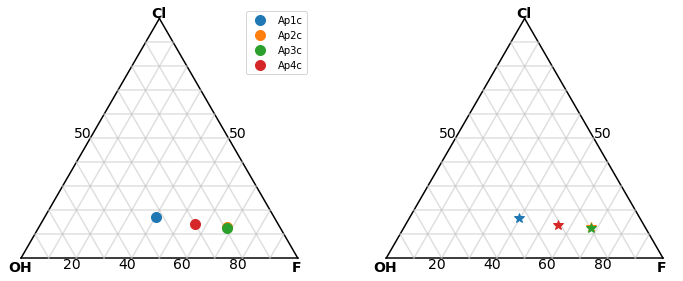

In [7]:
# set up a figure for ternary plot (e.g. figure with 2 subplots)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 6))

# set up blank ternary digram for each axis 
ApTernary.ternary(ax1)
ApTernary.ternary(ax2)

for idx, value in results_stoi.iterrows():
    x_f = value['XF']
    x_cl = value['XCL']
    x = (x_f + x_cl/2) * 100
    y = x_cl*math.sqrt(3)*50

    if x > 100:
        x = 100
    if y > math.sqrt(3)*50:
        y = math.sqrt(3)*50

    ax1.plot(x,y,'o',ms=10,label=value['sample'])

for idx, value in results_ketc.iterrows():
    x_f = value['XF']
    x_cl = value['XCL']
    x = (x_f + x_cl/2) * 100
    y = x_cl*math.sqrt(3)*50

    if x > 100:
        x = 100
    if y > math.sqrt(3)*50:
        y = math.sqrt(3)*50

    ax2.plot(x,y,'*',ms=10,label=value['sample'])

ax1.axis('off')
ax1.legend(loc='best')
plt.show()


### save results

In [8]:
results_stoi.to_csv("stoichiometry_26O.csv")
results_ketc.to_csv("stoichiometry_VariedO.csv")